# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/OnlineNewsPopularity.csv')   # Read the CSV file into a Pandas Dataframe
data.head()   # Peak into the first 5 rows of the dataset

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
data.shape    # Shape (rows, columns) of the dataset

(39644, 61)

In [4]:
data.info()   # Information about the columns of the dataset - name, datatype, count of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [5]:
# Does this dataset have any missing values?

if(data.isnull().values.any() == True):
  print("This dataset has some missing values which need to be handled")
  data = data.dropna()  # Rows with missing values (if any) are dropped

else:
  print("This dataset has no missing values. No action required.")

This dataset has no missing values. No action required.


In [6]:
# Does this dataset have any duplicate rows?

if(data.duplicated().values.any() == True):
  ndup = data[data.duplicated()].shape[0]
  print(f"This dataset has {ndup} duplicated rows")
  data = data.drop_duplicates()  # Rows with duplicate values (if any) are dropped
  print("\nThe duplicate rows have been dropped from the dataset now")

else:
  print("This dataset has no duplicated rows. No action required")



This dataset has no duplicated rows. No action required


In [7]:
data.describe().T     # Gives a descriptive statistical summary of the data columns

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


In [8]:
# Inspecting the target variable 'shares' - notice it is numeric, not categorical
data[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

Notice the target variable 'shares' is numeric, not categorical. Evidently, its distribution is right skewed with several outliers towards the right extreme of the distribution.

In [9]:
# Observing the correlation values of features wrt target variable 'shares'
corr_values = data.corr(numeric_only=True)[' shares'].sort_values(ascending=False).drop(' shares')
corr_values

 kw_avg_avg                       0.110413
 LDA_03                           0.083771
 kw_max_avg                       0.064306
 self_reference_avg_sharess       0.057789
 self_reference_min_shares        0.055958
 self_reference_max_shares        0.047115
 num_hrefs                        0.045404
 kw_avg_max                       0.044686
 kw_min_avg                       0.039551
 num_imgs                         0.039388
 global_subjectivity              0.031604
 kw_avg_min                       0.030406
 kw_max_min                       0.030114
 abs_title_sentiment_polarity     0.027135
 num_videos                       0.023936
 title_subjectivity               0.021967
 num_keywords                     0.021818
 is_weekend                       0.016958
 weekday_is_saturday              0.015082
 title_sentiment_polarity         0.012772
 avg_positive_polarity            0.012142
 max_positive_polarity            0.010068
 weekday_is_monday                0.009726
 n_tokens_t

From the above output, it is clear that none of the features have sufficient correlation with the target variable 'shares'. Thus, we shouldn't expect a strong relationship between the individual features and the target.

array([[<AxesSubplot: xlabel=' shares', ylabel=' shares'>,
        <AxesSubplot: xlabel=' kw_avg_avg', ylabel=' shares'>,
        <AxesSubplot: xlabel=' LDA_03', ylabel=' shares'>,
        <AxesSubplot: xlabel=' kw_max_avg', ylabel=' shares'>,
        <AxesSubplot: xlabel=' self_reference_avg_sharess', ylabel=' shares'>],
       [<AxesSubplot: xlabel=' shares', ylabel=' kw_avg_avg'>,
        <AxesSubplot: xlabel=' kw_avg_avg', ylabel=' kw_avg_avg'>,
        <AxesSubplot: xlabel=' LDA_03', ylabel=' kw_avg_avg'>,
        <AxesSubplot: xlabel=' kw_max_avg', ylabel=' kw_avg_avg'>,
        <AxesSubplot: xlabel=' self_reference_avg_sharess', ylabel=' kw_avg_avg'>],
       [<AxesSubplot: xlabel=' shares', ylabel=' LDA_03'>,
        <AxesSubplot: xlabel=' kw_avg_avg', ylabel=' LDA_03'>,
        <AxesSubplot: xlabel=' LDA_03', ylabel=' LDA_03'>,
        <AxesSubplot: xlabel=' kw_max_avg', ylabel=' LDA_03'>,
        <AxesSubplot: xlabel=' self_reference_avg_sharess', ylabel=' LDA_03'>],
       [

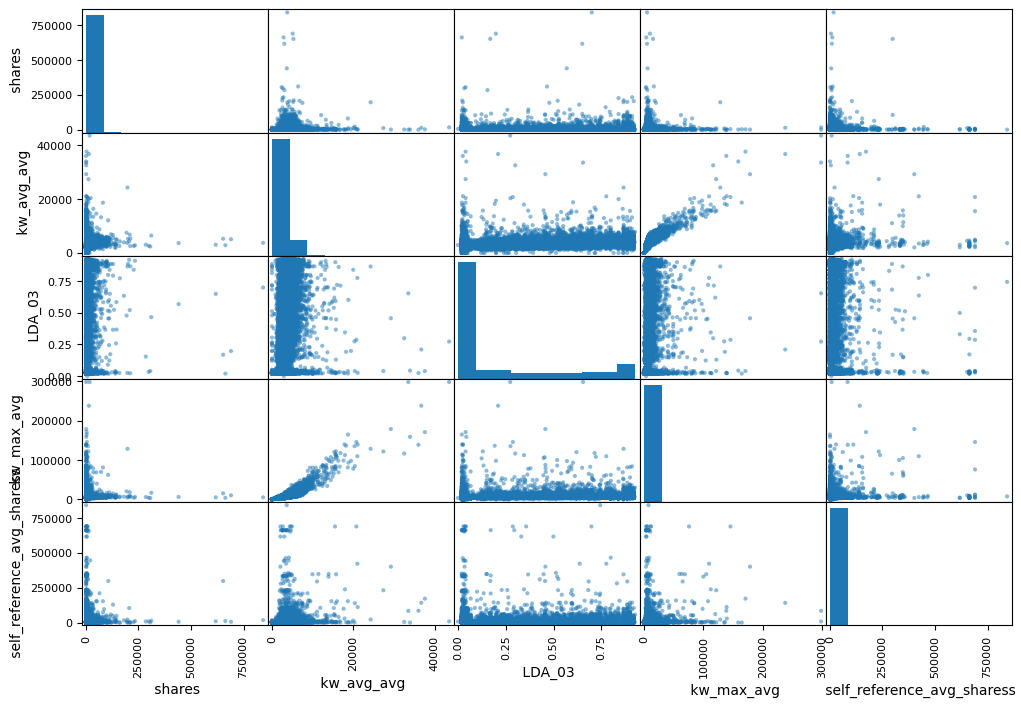

In [10]:
# Scatter matrix of the top 4 correlated features and target variable 'shares'
from pandas.plotting import scatter_matrix
scatter_matrix(data[[' shares', ' kw_avg_avg', ' LDA_03', ' kw_max_avg', ' self_reference_avg_sharess']], figsize=(12,8))

# Dataset Preparation

Deriving a binary target variable 'popularity' from 'shares' such that if number of shares is greater than the median value of 1400, it is considered popular (represented by 1), and otherwise unpopular (represented by 0).
 

In [11]:
data['popularity'] = np.where(data[' shares'] >= data[' shares'].median(), 1, 0)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.0,164.000000,339.000000,542.000000,731.0
n_tokens_title,39644.0,10.398749,2.114037,2.0,9.000000,10.000000,12.000000,23.0
n_tokens_content,39644.0,546.514731,471.107508,0.0,246.000000,409.000000,716.000000,8474.0
n_unique_tokens,39644.0,0.548216,3.520708,0.0,0.470870,0.539226,0.608696,701.0
n_non_stop_words,39644.0,0.996469,5.231231,0.0,1.000000,1.000000,1.000000,1042.0
...,...,...,...,...,...,...,...,...
title_sentiment_polarity,39644.0,0.071425,0.265450,-1.0,0.000000,0.000000,0.150000,1.0
abs_title_subjectivity,39644.0,0.341843,0.188791,0.0,0.166667,0.500000,0.500000,0.5
abs_title_sentiment_polarity,39644.0,0.156064,0.226294,0.0,0.000000,0.000000,0.250000,1.0
shares,39644.0,3395.380184,11626.950749,1.0,946.000000,1400.000000,2800.000000,843300.0


Preparing various input datasets for experiments:

1) Regular dataset: X
2) Standardised dataset: X_std
3) PCA Reduced dataset: X_pca

In [12]:
# 1) Regular Dataset

X = data.drop(['url', ' shares','popularity'], axis=1)  # Stores the input attributes data
y = data['popularity']                                  # Stores the target variable data 

# Import Scikit-Learn's train_test_split to split the data into 80% training and 20% testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Inspecting the shape of the dataset and taking a peak into it
print(f"\nNumber of samples and attributes of X: {X.shape}\n")
X.head()


Number of samples and attributes of X: (39644, 59)



,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [13]:
# 2) Standardized Dataset

# Standardizing the data subtracts the mean and scales the values to unit standard deviation
# It is applied to the input data to bring values to a standard range.

# Using the StandardScaler class to transform the regular data to Standardized data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X))

# Using train_test_split to create a new split for the Standardized input data
X_train_std, X_test_std = train_test_split(X_std, test_size=0.2, stratify=y, random_state=42)

# Inspecting the shape of the dataset after Standardization and taking a peak into it
print(f"\nNumber of samples and attributes of X after standardization: {X_std.shape}\n")
X_std.head()


Number of samples and attributes of X after standardization: (39644, 59)



,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1.75788,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,-0.304268,...,0.237337,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.138920
1,1.75788,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,-0.304268,...,-0.640040,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658
2,1.75788,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,-0.304268,...,1.358401,0.063865,0.981798,-1.621797,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658
3,1.75788,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,-0.304268,...,0.307442,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658
4,1.75788,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,-0.304268,...,0.548135,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.569949,-0.087056


In [14]:
# 3) PCA Reduced Dataset

# Using PCA class to reduce dimensionality of the data from 59 to 20
from sklearn.decomposition import PCA
pca_n = PCA(n_components=20)
X_pca = pd.DataFrame(pca_n.fit_transform(X_std))

X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, stratify=y, random_state=42)

print(f'Number of samples and attributes of X after PCA reduction: {X_pca.shape}')
X_pca.head()

Number of samples and attributes of X after PCA reduction: (39644, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.357725,-1.884084,-1.973666,0.000425,0.429458,-3.606534,1.423593,-1.421051,0.460950,0.237703,0.365818,1.104088,1.836571,0.055531,0.938646,-0.621327,-0.122772,2.167602,0.659859,0.576557
1,0.196358,-4.305496,-1.136256,0.083794,-0.351661,-1.566557,3.366056,0.308691,1.895719,-1.308780,0.637718,0.001690,0.499128,0.460785,-0.930257,-0.492867,0.176180,1.937947,0.893049,0.770442
2,-3.731167,-3.498235,-1.735581,-0.077268,-0.386753,-0.861691,2.505545,-0.271894,-0.267820,-0.610222,-0.268475,-0.124690,0.401750,-0.557223,0.025882,-0.070444,0.120952,1.647232,1.592734,1.142513
3,-0.670022,-1.695243,-3.436183,-0.104889,1.186251,-2.169446,1.394080,-1.008037,-0.532146,-0.927692,0.015373,2.140668,0.807468,0.386199,0.330687,-0.531894,-0.123557,1.839120,0.843007,0.629822
4,-4.169597,-3.718585,-1.441748,-0.130990,0.378237,0.342059,-2.743172,-1.429236,0.533164,-0.887156,2.867864,-0.675412,-0.112758,0.772010,0.846878,-0.697648,-0.012652,2.698107,0.431718,0.883883


In [15]:
# Halving the number of train data instances to be able to meet computational requirements of all experiments

X_train = X_train[0:X_train.shape[0]//2]
print(f'\nNumber of samples and attributes of X_train: {X_train.shape}')

X_train_std = X_train_std[0:X_train_std.shape[0]//2]
print(f'\nNumber of samples and attributes of X_train_std: {X_train_std.shape}')

X_train_pca = X_train_pca[0:X_train_pca.shape[0]//2]
print(f'\nNumber of samples and attributes of X_train_pca: {X_train_pca.shape}')

y_train = y_train[0:y_train.shape[0]//2]
print(f'\nNumber of samples and attributes of y_train: {y_train.shape}')


Number of samples and attributes of X_train: (15857, 59)

Number of samples and attributes of X_train_std: (15857, 59)

Number of samples and attributes of X_train_pca: (15857, 20)

Number of samples and attributes of y_train: (15857,)


C:\Users\HP\AppData\Local\Temp\ipykernel_34688\1960233730.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y_train[0:y_train.shape[0]//2]


# Dimensionality Reduction & Data Visualisation

### Principal Component Analysis (PCA)

Principal Component Analysis reduces the features of the data by finding their directions of maximum variance and projecting the data along those directions, thus preserving information of the original attributes and also reducing the size of the dataset for better computations and visualisations.

In [87]:
# Here, we reduce the dimensions of the input data from 59 to 2 so that it can be visualised in 3D

from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
X_2D_pca = pca2.fit_transform(X_std)

print(f'\nPCA Features: Number of samples and attributes: {X_2D_pca.shape}')


PCA Features: Number of samples and attributes: (39644, 2)


3D Point Cloud with respect to target variable - number of shares

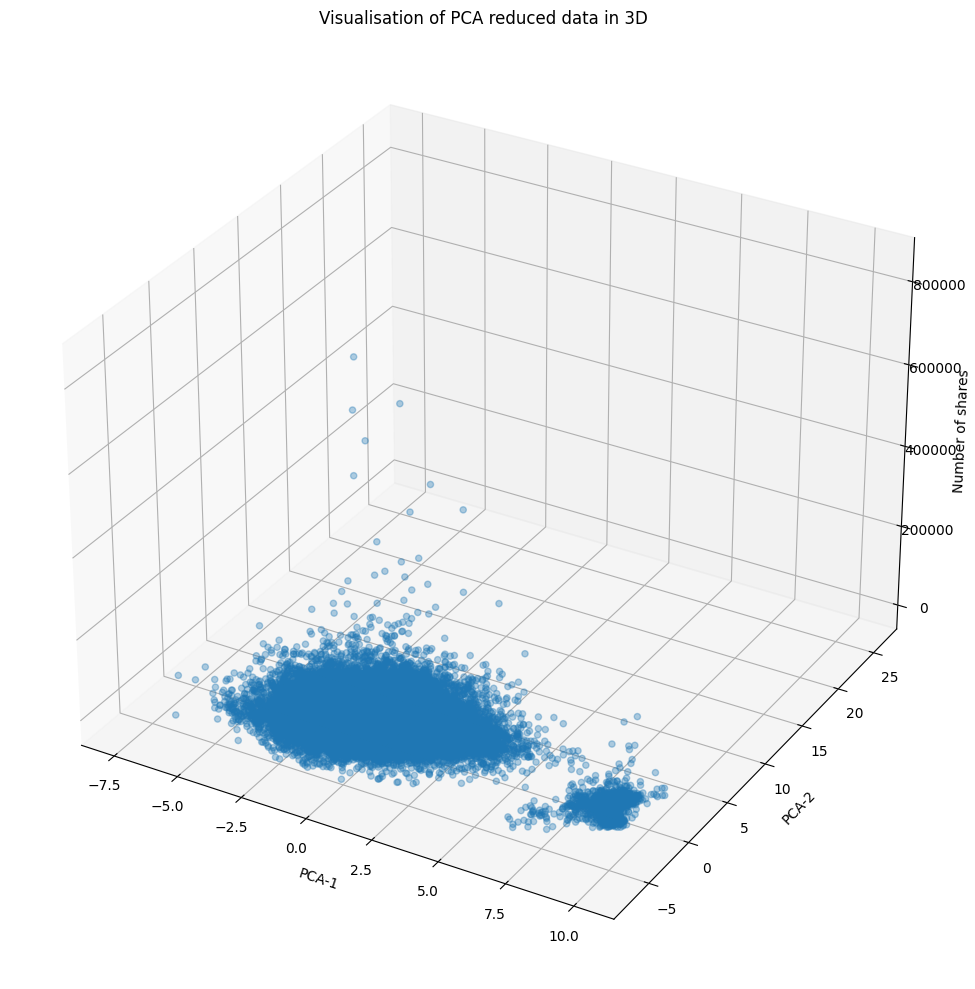

In [88]:
# Visualising the 3D point cloud of the PCA reduced dataset against the original target variable 'shares'

y_shares = data[' shares']

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_2D_pca[:, 0], X_2D_pca[:, 1], y_shares, alpha=0.35);

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("Number of shares")

plt.title("Visualisation of PCA reduced data in 3D")
plt.tight_layout()
plt.show()
# fig.savefig('PCA visualisation.png')

Differentiating data points by colour based on their popularity

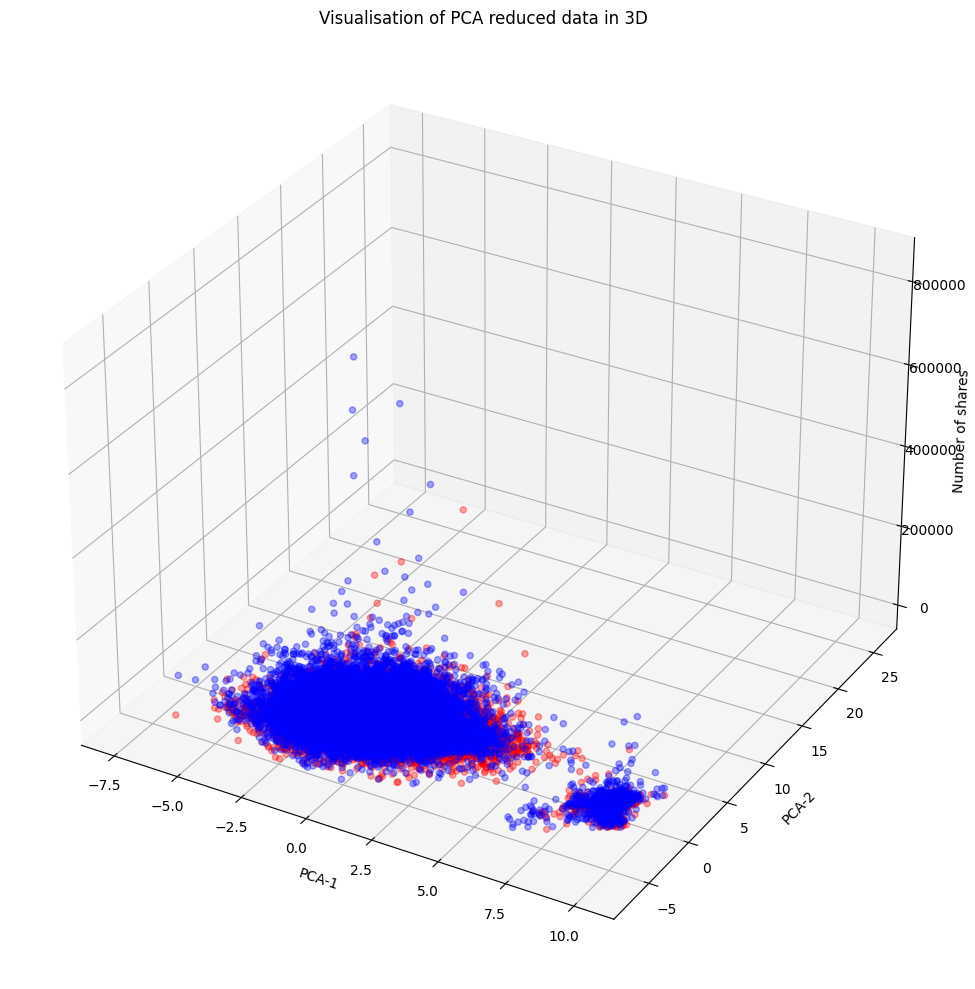

In [89]:
# Visualising the 3D point cloud of the PCA reduced dataset against the categorical target variable 'popularity'

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Plotting separate 3D Scatterplots based on class labels of target variable 'popularity'
ax.scatter(X_2D_pca[y==0, 0], X_2D_pca[y==0, 1], y_shares[y==0], color="r", alpha=0.35); 
ax.scatter(X_2D_pca[y==1, 0], X_2D_pca[y==1, 1], y_shares[y==1], color="b", alpha=0.35); 

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("Number of shares")

plt.title("Visualisation of PCA reduced data in 3D")
plt.tight_layout()
plt.show()
# fig.savefig('PCA visualisation.png')

The point cloud appears to form two clusters - one large cluster for higher values of PCA-1 and another small for cluster for lower values of PCA-1. Otherwise, there appears to be no distinct separation between popular (blue) and unpopular (red) data points with respect to the PCA features.

Viewing a zoomed-in vertical cross section of the above plot to get a better view of how the popular (blue) and unpopular (red) data points are distributed relative to each other

Text(0.5, 1.0, 'Visualisation of PCA reduced data in 2D')

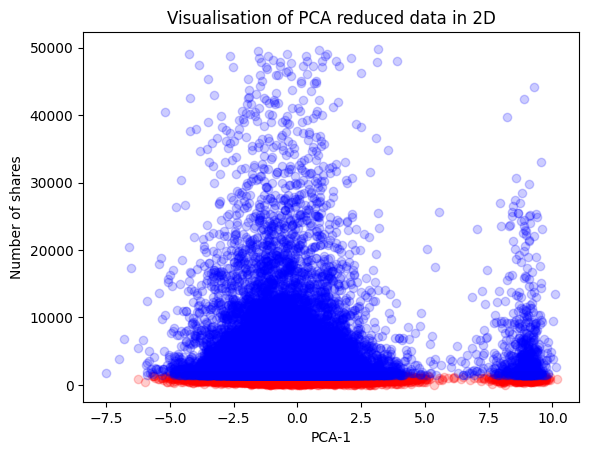

In [90]:
# Removing outliers to get a closer view of the body of the data - here we consider only data for which shares<50,000
X_2D_pca_50 = X_2D_pca[y_shares < 50000]
y_shares_50 = y_shares[y_shares < 50000]
y_50 = y[y_shares < 50000]

plt.scatter(X_2D_pca_50[y_50==0, 0], y_shares_50[y_50==0], color='r', alpha=0.20)
plt.scatter(X_2D_pca_50[y_50==1, 0], y_shares_50[y_50==1], color='b', alpha=0.20)
plt.xlabel("PCA-1")
plt.ylabel("Number of shares")
plt.title("Visualisation of PCA reduced data in 2D")

Since we decided to consider data points with number of shares > 1400 as popular and the rest as unpopular, a clear demarcation can be seen separating the blue points from the red at the level of 1400. The two clusters of data formed is also visible.

Visualising the point cloud, this time mapping the features to the binary classified target variable 'popularity'

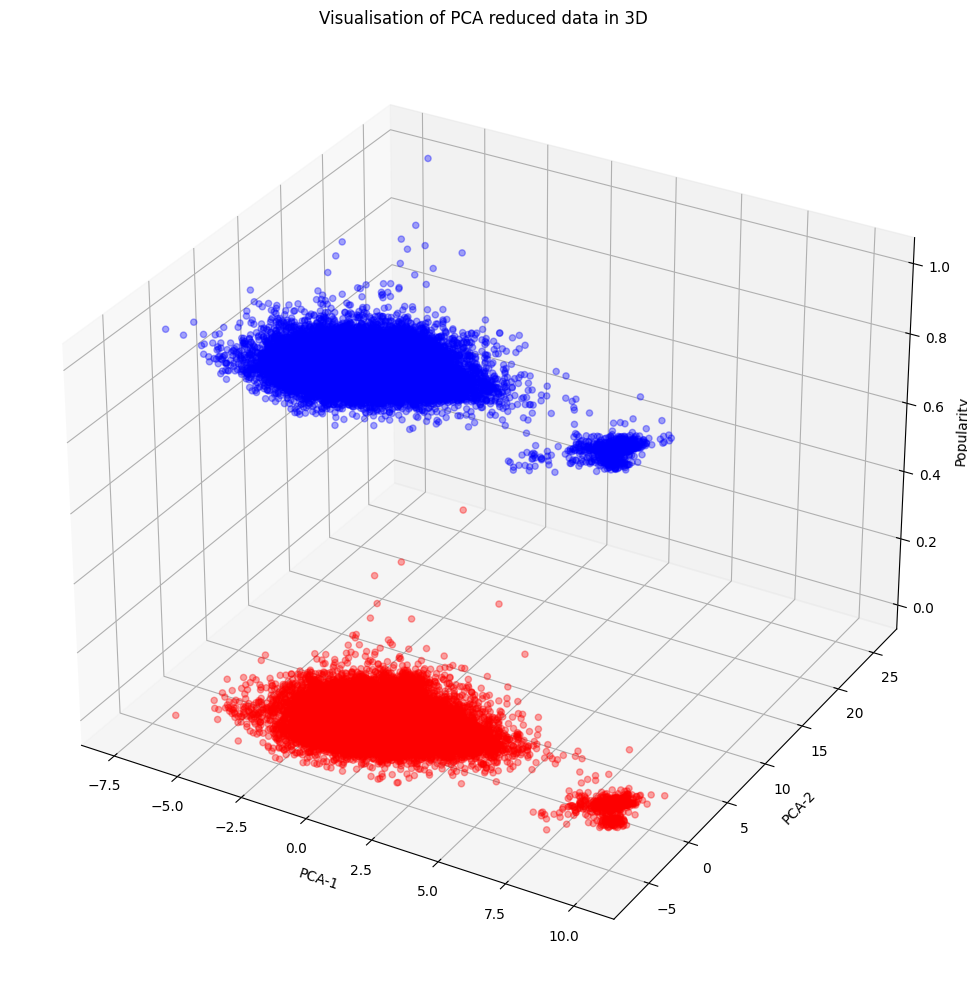

In [91]:
# Visualising the 3D point cloud of the PCA reduced dataset against the categorical target variable 'popularity'

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Plotting separate 3D Scatterplots based on class labels of target variable 'popularity'
ax.scatter(X_2D_pca[y==0, 0], X_2D_pca[y==0, 1], y[y==0], color="r", alpha=0.35); 
ax.scatter(X_2D_pca[y==1, 0], X_2D_pca[y==1, 1], y[y==1], color="b", alpha=0.35); 

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("Popularity")

plt.title("Visualisation of PCA reduced data in 3D")
plt.tight_layout()
plt.show()
# fig.savefig('PCA visualisation.png')

Once again, the distribution of both classes appears identical and there are no evident clues about any distinction between popular (blue) and unpopular (red) news articles based on the features.

# Baseline Model - Logistic Regression

### Regular Data

In [16]:
# Creating a logistic regression model and fitting it to the training data

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

# The model's score on the testing data
print("REGULAR DATA")
lr_score = lr_clf.score(X_test, y_test).round(5)
print('Classification accuracy: ', lr_score)

REGULAR DATA
Classification accuracy:  0.58507


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


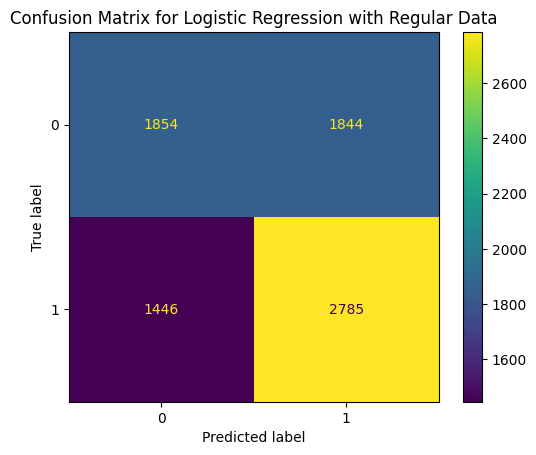

In [17]:
## Confusion Matrix

# Model's predictions on the test data
y_pred = lr_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

disp_lr = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred))
disp_lr.plot()
plt.title("Confusion Matrix for Logistic Regression with Regular Data")
plt.show()

In [18]:
# Classification report

from sklearn.metrics import classification_report

lr_report = classification_report(y_test, lr_clf.predict(X_test))
print(lr_report)

              precision    recall  f1-score   support

           0       0.56      0.50      0.53      3698
           1       0.60      0.66      0.63      4231

    accuracy                           0.59      7929
   macro avg       0.58      0.58      0.58      7929
weighted avg       0.58      0.59      0.58      7929



In [19]:
# Cross validation of the model using 5 folds in terms of mean +/- std

from sklearn.model_selection import cross_val_score

cv_scores_lr = cross_val_score(lr_clf, X_train, y_train, scoring='f1_weighted', cv=5)
cv_score_lr = (str(cv_scores_lr.mean().round(5)) + ' +/- ' + str(cv_scores_lr.std().round(5)))
print('\n', cv_score_lr)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mod


 0.59376 +/- 0.01425


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Standardized Data

In [20]:
### Logistic Regression with standard scaling

# Creating a logistic regression model and fitting it to the training data
lr_clf_std = LogisticRegression()
lr_clf_std.fit(X_train_std, y_train)

# The model's score on the testing data
print("STANDARDIZED DATA")
lr_score_std = lr_clf_std.score(X_test_std, y_test).round(5)
print('Classification accuracy: ', lr_score_std)

STANDARDIZED DATA
Classification accuracy:  0.65456


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


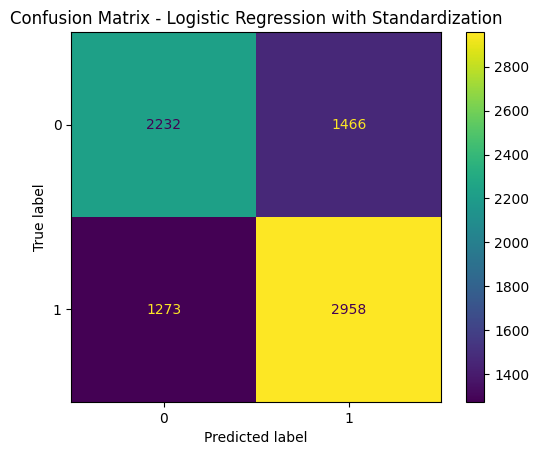

In [21]:
## Confusion Matrix - After Standardization

# Model's predictions on the test data
y_pred_std = lr_clf_std.predict(X_test_std)

disp_lr_std = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_std))
disp_lr_std.plot()
plt.title("Confusion Matrix - Logistic Regression with Standardization")
plt.show()

In [22]:
# Classification report - After Standardization

lr_std_report = classification_report(y_test, lr_clf_std.predict(X_test_std))
print(lr_std_report)

              precision    recall  f1-score   support

           0       0.64      0.60      0.62      3698
           1       0.67      0.70      0.68      4231

    accuracy                           0.65      7929
   macro avg       0.65      0.65      0.65      7929
weighted avg       0.65      0.65      0.65      7929



In [23]:
# Cross validation of the model using 5 folds in terms of mean +/- std

cv_scores_lr_std = cross_val_score(lr_clf_std, X_train_std, y_train, scoring='f1_weighted', cv=5)
cv_score_lr_std = (str(cv_scores_lr_std.mean().round(5)) + ' +/- ' + str(cv_scores_lr_std.std().round(5)))
print('\n', cv_score_lr_std)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mod


 0.65394 +/- 0.00577


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### PCA Reduced Data

In [24]:
### Logistic Regression with Dimensionality Reduction (PCA)

# Creating a logistic regression model and fitting it to the training data
lr_clf_pca = LogisticRegression()
lr_clf_pca.fit(X_train_pca, y_train)

# The model's score on the testing data
print('PCA REDUCED DATA')
lr_score_pca = lr_clf_pca.score(X_test_pca, y_test).round(5)
print('Classification accuracy: ', lr_score_pca)

PCA REDUCED DATA
Classification accuracy:  0.63615


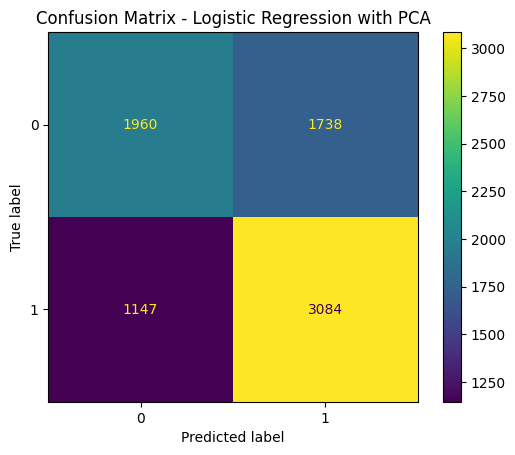

In [25]:
## Confusion Matrix - After PCA

# Model's predictions on the test data
y_pred_pca = lr_clf_pca.predict(X_test_pca)

disp_lr_pca = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_pca))
disp_lr_pca.plot()
plt.title('Confusion Matrix - Logistic Regression with PCA')
plt.show()

In [26]:
# Classification report - After PCA

lr_pca_report = classification_report(y_test, lr_clf_pca.predict(X_test_pca))
print(lr_pca_report)

              precision    recall  f1-score   support

           0       0.63      0.53      0.58      3698
           1       0.64      0.73      0.68      4231

    accuracy                           0.64      7929
   macro avg       0.64      0.63      0.63      7929
weighted avg       0.64      0.64      0.63      7929



In [27]:
# Cross validation of the model using 5 folds in terms of mean +/- std

cv_scores_lr_pca = cross_val_score(lr_clf_pca, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_lr_pca = (str(cv_scores_lr_pca.mean().round(5)) + ' +/- ' + str(cv_scores_lr_pca.std().round(5)))
print('\n', cv_score_lr_pca)


 0.63381 +/- 0.00168


# SVM Classification

## Using LinearSVC

The LinearSVC class implements one-vs-rest approach to classification, hence is faster than the SVC(kernel='linear') class

### Regular Data

In [31]:
# Fitting the data into LinearSVC model

from sklearn.svm import LinearSVC

lin_svc = LinearSVC(C=2)
lin_svc.fit(X_train, y_train)

# The LinearSVC model's score on the testing data
print('REGULAR DATA')
lin_svc_score = lin_svc.score(X_test, y_test).round(5)
print('Classification accuracy: ', lin_svc_score)

REGULAR DATA
Classification accuracy:  0.48619


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


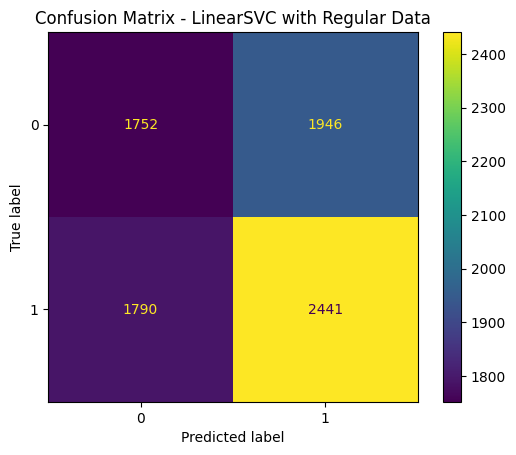

In [105]:
## Confusion Matrix

# Model's predictions on the test data
y_pred_linsvc = lin_svc.predict(X_test)

disp_linsvc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_linsvc))
disp_linsvc.plot()
plt.title('Confusion Matrix - LinearSVC with Regular Data')
plt.show()

In [106]:
# LinearSVC Classification report

linsvc_report = classification_report(y_test, lin_svc.predict(X_test))
print(linsvc_report)

              precision    recall  f1-score   support

           0       0.49      0.47      0.48      3698
           1       0.56      0.58      0.57      4231

    accuracy                           0.53      7929
   macro avg       0.53      0.53      0.53      7929
weighted avg       0.53      0.53      0.53      7929



In [56]:
# Cross validation of the LinearSVC model using 5 folds in terms of mean +/- std

cv_scores_linsvc = cross_val_score(lin_svc, X_train, y_train, scoring='f1_weighted', cv=5)
cv_score_linsvc = (str(cv_scores_linsvc.mean().round(5)) + ' +/- ' + str(cv_scores_linsvc.std().round(5)))
print('\n', cv_score_linsvc)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to co


 0.4078 +/- 0.06238


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Standardized Data

In [33]:
# Fitting the Standardized data into LinearSVR model
lin_svc_std = LinearSVC(C=2)
lin_svc_std.fit(X_train_std, y_train)

# The LinearSVC model's score on the testing data
print('STANDARDIZED DATA')
lin_svc_score_std = lin_svc_std.score(X_test_std, y_test).round(5)
print('Classification accuracy: ', lin_svc_score_std)

STANDARDIZED DATA
Classification accuracy:  0.6538


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


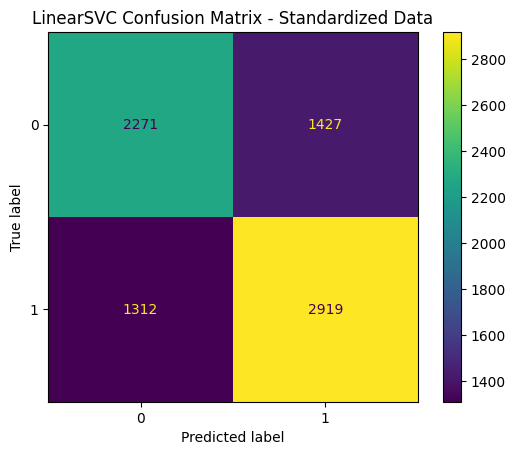

In [109]:
## Confusion Matrix - After Standardization

# Model's predictions on the test data
y_pred_linsvc_std = lin_svc_std.predict(X_test_std)

disp_linsvc_std = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_linsvc_std))
disp_linsvc_std.plot()
plt.title('LinearSVC Confusion Matrix - Standardized Data')
plt.show()

In [110]:
# LinearSVC Classification report - After Standardization

linsvc_std_report = classification_report(y_test, lin_svc_std.predict(X_test_std))
print(linsvc_std_report)

              precision    recall  f1-score   support

           0       0.63      0.61      0.62      3698
           1       0.67      0.69      0.68      4231

    accuracy                           0.65      7929
   macro avg       0.65      0.65      0.65      7929
weighted avg       0.65      0.65      0.65      7929



In [58]:
# Cross validation of the LinearSVC model using 5 folds in terms of mean +/- std

cv_scores_linsvc_std = cross_val_score(lin_svc_std, X_train_std, y_train, scoring='f1_weighted', cv=5)
cv_score_linsvc_std = (str(cv_scores_linsvc_std.mean().round(5)) + ' +/- ' + str(cv_scores_linsvc_std.std().round(5)))
print('\n', cv_score_linsvc_std)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to co


 0.65408 +/- 0.00588


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### PCA Reduced Data

In [59]:
# Fitting the PCA Reduced data into LinearSVC model
lin_svc_pca = LinearSVC(tol=0.01, C=2)
lin_svc_pca.fit(X_train_pca, y_train)

# The LinearSVC model's score on the testing data
print('PCA REDUCED DATA')
lin_svc_score_pca = lin_svc_pca.score(X_test_pca, y_test).round(5)
print('Classification accuracy: ', lin_svc_score_pca)

PCA REDUCED DATA
Classification accuracy:  0.63905


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


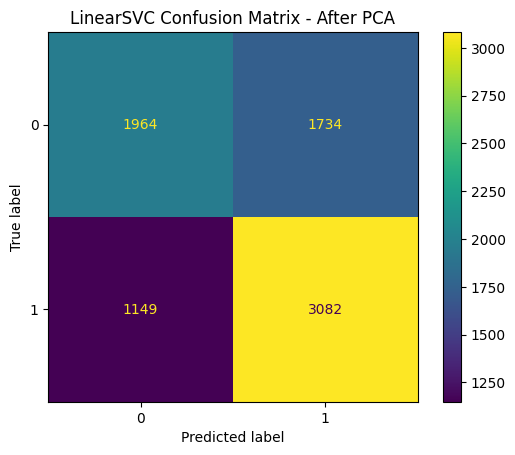

In [113]:
## Confusion Matrix - After PCA

# Model's predictions on the test data
y_pred_linsvc_pca = lin_svc_pca.predict(X_test_pca)

disp_linsvc_pca = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_linsvc_pca))
disp_linsvc_pca.plot()
plt.title('LinearSVC Confusion Matrix - After PCA')
plt.show()

In [114]:
# LinearSVC Classification report - After PCA

linsvc_pca_report = classification_report(y_test, lin_svc_pca.predict(X_test_pca))
print(linsvc_pca_report)

              precision    recall  f1-score   support

           0       0.63      0.53      0.58      3698
           1       0.64      0.73      0.68      4231

    accuracy                           0.64      7929
   macro avg       0.64      0.63      0.63      7929
weighted avg       0.64      0.64      0.63      7929



In [60]:
# Cross validation of the LinearSVC model using 5 folds in terms of mean +/- std

cv_scores_linsvc_pca = cross_val_score(lin_svc_pca, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_linsvc_pca = (str(cv_scores_linsvc_pca.mean().round(5)) + ' +/- ' + str(cv_scores_linsvc_pca.std().round(5)))
print('\n', cv_score_linsvc_pca)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to co


 0.63532 +/- 0.00326


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Using SVR with kernel

Implemented on PCA Reduced dataset only - due to high computational time for datasets with more features

### Linear Kernel

In [35]:
# Fit the data into SVR model with linear kernel
from sklearn.svm import SVC

svc_lin = SVC(kernel='linear', C=2)
svc_lin.fit(X_train_pca, y_train)

# Linear kernel SVC model's score on testing data
print('LINEAR KERNEL')
svc_lin_score = svc_lin.score(X_test_pca, y_test).round(5)
print('Classification accuracy: ', svc_lin_score)

LINEAR KERNEL
Classification accuracy:  0.62467


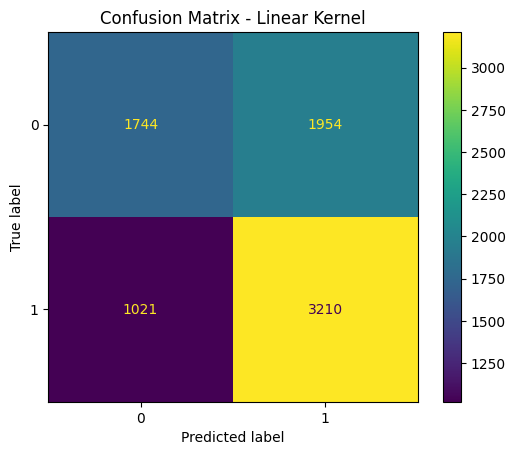

In [117]:
## Confusion Matrix

# Model's predictions on the test data
y_pred_svclin = svc_lin.predict(X_test_pca)

disp_svclin = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_svclin))
disp_svclin.plot()
plt.title('Confusion Matrix - Linear Kernel')
plt.show()

In [118]:
# Classification report - Linear Kernel SVC

svc_lin_report = classification_report(y_test, svc_lin.predict(X_test_pca))
print(svc_lin_report)

              precision    recall  f1-score   support

           0       0.63      0.47      0.54      3698
           1       0.62      0.76      0.68      4231

    accuracy                           0.62      7929
   macro avg       0.63      0.62      0.61      7929
weighted avg       0.63      0.62      0.62      7929



In [62]:
# Cross validation of the Linear Kernel SVC model using 5 folds in terms of mean +/- std

cv_scores_svclin = cross_val_score(svc_lin, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_svclin = (str(cv_scores_svclin.mean().round(5)) + ' +/- ' + str(cv_scores_svclin.std().round(5)))
print('\n', cv_score_svclin)


 0.62283 +/- 0.00237


### Polynomial Kernel

In [63]:
# Fit the data into SVR model with polynomial kernel
svc_poly = SVC(kernel='poly', C=2)
svc_poly.fit(X_train_pca, y_train)

# Polynomial kernel SVC model's score on testing data
print('POLYNOMIAL KERNEL')
svc_poly_score = svc_poly.score(X_test_pca, y_test).round(5)
print('Classification accuracy: ', svc_poly_score)

POLYNOMIAL KERNEL
Classification accuracy:  0.63942


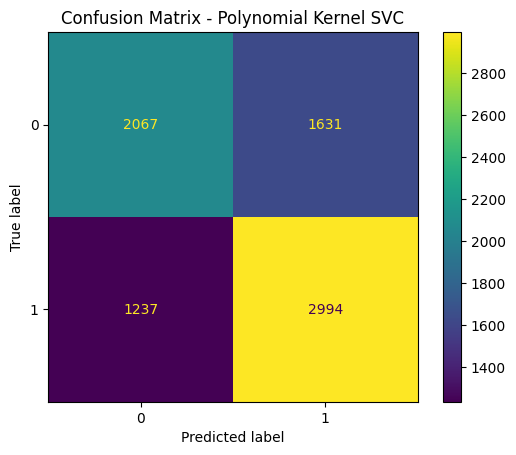

In [121]:
## Confusion Matrix

# Model's predictions on the test data
y_pred_svcpoly = svc_poly.predict(X_test_pca)

disp_svcpoly = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_svcpoly))
disp_svcpoly.plot()
plt.title('Confusion Matrix - Polynomial Kernel SVC')
plt.show()

In [122]:
# Classification report - Polynomial Kernel SVC

svc_poly_report = classification_report(y_test, svc_poly.predict(X_test_pca))
print(svc_poly_report)

              precision    recall  f1-score   support

           0       0.63      0.56      0.59      3698
           1       0.65      0.71      0.68      4231

    accuracy                           0.64      7929
   macro avg       0.64      0.63      0.63      7929
weighted avg       0.64      0.64      0.64      7929



In [64]:
# Cross validation of the Polynomial Kernel SVC model using 5 folds in terms of mean +/- std

cv_scores_svcpoly = cross_val_score(svc_poly, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_svcpoly = (str(cv_scores_svcpoly.mean().round(5)) + ' +/- ' + str(cv_scores_svcpoly.std().round(5)))
print('\n', cv_score_svcpoly)


 0.63955 +/- 0.00486


### RBF Kernel

In [20]:
# Fit the data into SVR model with RBF kernel
svc_rbf = SVC(kernel='rbf', C=2, gamma='scale')
svc_rbf.fit(X_train_pca, y_train)

# RBF kernel SVC model's score on testing data
print('RBF KERNEL')
svc_rbf_score = svc_rbf.score(X_test_pca, y_test).round(5)
print('Classification accuracy: ', svc_rbf_score)

RBF KERNEL
Classification accuracy:  0.64523


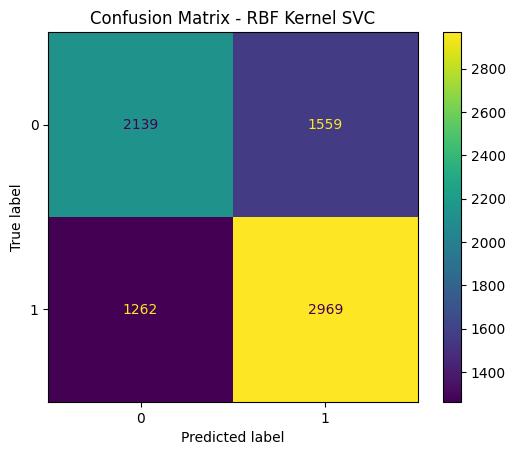

In [125]:
## Confusion Matrix

# Model's predictions on the test data
y_pred_svcrbf = svc_rbf.predict(X_test_pca)

disp_svcrbf = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_svcrbf))
disp_svcrbf.plot()
plt.title('Confusion Matrix - RBF Kernel SVC')
plt.show()

In [126]:
# Classification report - RBF Kernel SVC

svc_rbf_report = classification_report(y_test, svc_rbf.predict(X_test_pca))
print(svc_rbf_report)

              precision    recall  f1-score   support

           0       0.63      0.58      0.60      3698
           1       0.66      0.70      0.68      4231

    accuracy                           0.64      7929
   macro avg       0.64      0.64      0.64      7929
weighted avg       0.64      0.64      0.64      7929



In [66]:
# Cross validation of the RBF Kernel SVC model using 5 folds in terms of mean +/- std

cv_scores_svcrbf = cross_val_score(svc_rbf, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_svcrbf = (str(cv_scores_svcrbf.mean().round(5)) + ' +/- ' + str(cv_scores_svcrbf.std().round(5)))
print('\n', cv_score_svcrbf)


 0.64892 +/- 0.00596


# Decision Trees

### Regular Data

In [28]:
# Importing the DecisionTreeClassifier class from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Fitting the data into Decision Tree Classifier model
DT_clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=32, random_state=42)
DT_clf.fit(X_train, y_train)

# The Decision Tree Classifier model's score on the testing data
print('REGULAR DATA')
DT_clf_score = DT_clf.score(X_test, y_test).round(5)
print('Classification accuracy: ', DT_clf_score)

REGULAR DATA
Classification accuracy:  0.64296


In [129]:
# from sklearn.tree import export_graphviz

# export_graphviz(DT_clf, out_file="ONP DT_clf.dot", feature_names=X.columns, class_names=["0","1"], rounded=True, filled=True)

# from graphviz import Source
# Source.from_file("ONP DT_clf.dot")

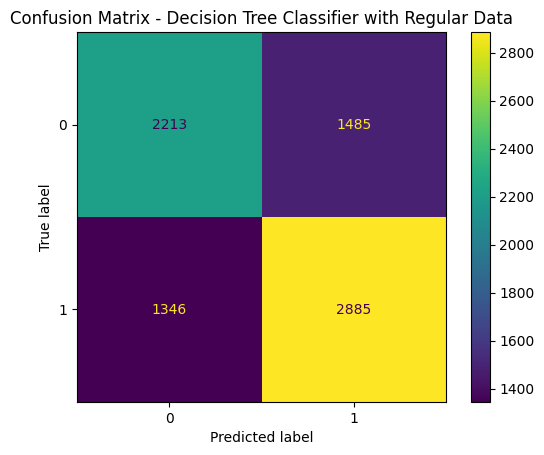

In [130]:
## Confusion Matrix

# Model's predictions on the test data
y_pred_DT = DT_clf.predict(X_test)

disp_DT = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_DT))
disp_DT.plot()
plt.title('Confusion Matrix - Decision Tree Classifier with Regular Data')
plt.show()

In [131]:
# Decision Tree Classifier - Classification report

DT_report = classification_report(y_test, y_pred_DT)
print(DT_report)

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      3698
           1       0.66      0.68      0.67      4231

    accuracy                           0.64      7929
   macro avg       0.64      0.64      0.64      7929
weighted avg       0.64      0.64      0.64      7929



In [67]:
# Cross validation of the Decision Tree Classifier model using 5 folds in terms of mean +/- std

cv_scores_DT = cross_val_score(DT_clf, X_train, y_train, scoring='f1_weighted', cv=5)
cv_score_DT = (str(cv_scores_DT.mean().round(5)) + ' +/- ' + str(cv_scores_DT.std().round(5)))
print('\n', cv_score_DT)


 0.64028 +/- 0.00744


### Standardized Data

In [68]:
# Fitting the Standardized data into Decision Tree Classifier model
DT_clf_std = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=32, random_state=42)
DT_clf_std.fit(X_train_std, y_train)

# The model's score on the testing data
print("STANDARDIZED DATA")
DT_clf_score_std = DT_clf_std.score(X_test_std, y_test).round(5)
print('Classification accuracy: ', DT_clf_score_std)

STANDARDIZED DATA
Classification accuracy:  0.64296


In [134]:
# from sklearn.tree import export_graphviz

# export_graphviz(DT_clf_std, out_file="ONP DT_clf_std.dot", feature_names=X.columns, class_names=["0","1"], rounded=True, filled=True)

# from graphviz import Source
# Source.from_file("ONP DT_clf_std.dot")

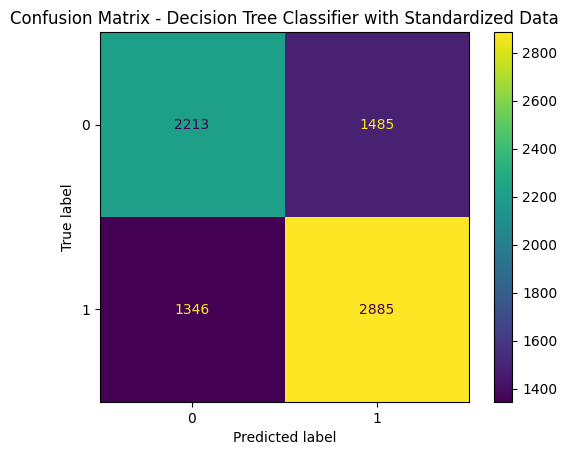

In [135]:
## Confusion Matrix - After Standardization

# Model's predictions on the test data
y_pred_DT_std = DT_clf_std.predict(X_test_std)

disp_DT_std = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_DT_std))
disp_DT_std.plot()
plt.title('Confusion Matrix - Decision Tree Classifier with Standardized Data')
plt.show()

In [136]:
# Classification report - After Standardization

DT_report_std = classification_report(y_test, y_pred_DT_std)
print(DT_report_std)

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      3698
           1       0.66      0.68      0.67      4231

    accuracy                           0.64      7929
   macro avg       0.64      0.64      0.64      7929
weighted avg       0.64      0.64      0.64      7929



In [69]:
# Cross validation of the Decision Tree Classifier model using 5 folds in terms of mean +/- std

cv_scores_DT_std = cross_val_score(DT_clf_std, X_train_std, y_train, scoring='f1_weighted', cv=5)
cv_score_DT_std = (str(cv_scores_DT_std.mean().round(5)) + ' +/- ' + str(cv_scores_DT_std.std().round(5)))
print('\n', cv_score_DT_std)


 0.64028 +/- 0.00744


### PCA Reduced Data

In [70]:
# Fitting the PCA Reduced data into Decision Tree Classifier model
DT_clf_pca = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=32, random_state=42)
DT_clf_pca.fit(X_train_pca, y_train)

# The model's score on the testing data
print('PCA REDUCED DATA')
DT_clf_score_pca = DT_clf_pca.score(X_test_pca, y_test).round(5)
print('Classification accuracy: ', DT_clf_score_pca)

PCA REDUCED DATA
Classification accuracy:  0.61534


In [139]:
# from sklearn.tree import export_graphviz

# export_graphviz(DT_clf_pca, out_file="ONP DT_clf_pca.dot", feature_names=X.columns, class_names=["0","1"], rounded=True, filled=True)

# from graphviz import Source
# Source.from_file("ONP DT_clf_pca.dot")

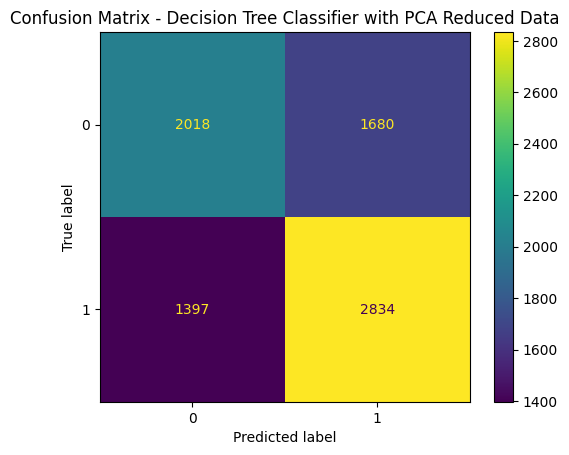

In [140]:
## Confusion Matrix - After PCA

# Model's predictions on the test data
y_pred_DT_pca = DT_clf_pca.predict(X_test_pca)

disp_DT_pca = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_DT_pca))
disp_DT_pca.plot()
plt.title('Confusion Matrix - Decision Tree Classifier with PCA Reduced Data')
plt.show()

In [141]:
# Classification report - After PCA

DT_report_pca = classification_report(y_test, y_pred_DT_pca)
print(DT_report_pca)

              precision    recall  f1-score   support

           0       0.59      0.55      0.57      3698
           1       0.63      0.67      0.65      4231

    accuracy                           0.61      7929
   macro avg       0.61      0.61      0.61      7929
weighted avg       0.61      0.61      0.61      7929



In [71]:
# Cross validation of the Decision Tree Classifier model using 5 folds in terms of mean +/- std

cv_scores_DT_pca = cross_val_score(DT_clf_pca, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_DT_pca = (str(cv_scores_DT_pca.mean().round(5)) + ' +/- ' + str(cv_scores_DT_pca.std().round(5)))
print('\n', cv_score_DT_pca)


 0.61597 +/- 0.00456


# Random Forest

### Regular Data

In [72]:
# Importing the RandomForestClassifier class from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Fitting the data into Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=32, n_jobs=-1, random_state=42)
RF_clf.fit(X_train, y_train)

# The Random Forest model's score on the testing data
print('REGULAR DATA')
RF_clf_score = RF_clf.score(X_test, y_test)
print('R2 score: ', RF_clf_score)

REGULAR DATA
R2 score:  0.6502711565140623


In [144]:
# from sklearn.tree import export_graphviz

# export_graphviz(RF_clf, out_file="ONP RF_clf.dot", feature_names=X.columns, class_names=["0","1"], rounded=True, filled=True)

# from graphviz import Source
# Source.from_file("ONP RF_clf.dot")

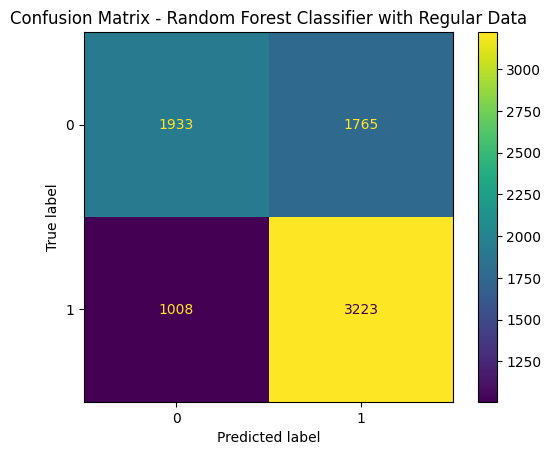

In [145]:
## Confusion Matrix

# Model's predictions on the test data
y_pred_RF = RF_clf.predict(X_test)

disp_RF = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_RF))
disp_RF.plot()
plt.title('Confusion Matrix - Random Forest Classifier with Regular Data')
plt.show()

In [146]:
# Random Forest Classifier - Classification report

RF_report = classification_report(y_test, y_pred_RF)
print(RF_report)

              precision    recall  f1-score   support

           0       0.66      0.52      0.58      3698
           1       0.65      0.76      0.70      4231

    accuracy                           0.65      7929
   macro avg       0.65      0.64      0.64      7929
weighted avg       0.65      0.65      0.64      7929



In [73]:
# Cross validation of the Random Forest Classifier model using 5 folds in terms of mean +/- std

cv_scores_RF = cross_val_score(RF_clf, X_train, y_train, scoring='f1_weighted', cv=5)
cv_score_RF = (str(cv_scores_RF.mean().round(5)) + ' +/- ' + str(cv_scores_RF.std().round(5)))
print('\n', cv_score_RF)


 0.65733 +/- 0.00784


### Standardized Data

In [22]:
# Fitting the Standardized data into Random Forest Classifier model
RF_clf_std = RandomForestClassifier(n_estimators=100, max_leaf_nodes=32, n_jobs=-1, random_state=42)
RF_clf_std.fit(X_train_std, y_train)

# The model's score on the testing data
print("STANDARDIZED DATA")
RF_clf_score_std = RF_clf_std.score(X_test_std, y_test)
print('R2 score: ', RF_clf_score_std)

STANDARDIZED DATA
R2 score:  0.6506495144406609


In [149]:
# from sklearn.tree import export_graphviz

# export_graphviz(RF_clf_std, out_file="ONP RF_clf_std.dot", feature_names=X.columns, class_names=["0","1"], rounded=True, filled=True)

# from graphviz import Source
# Source.from_file("ONP RF_clf_std.dot")

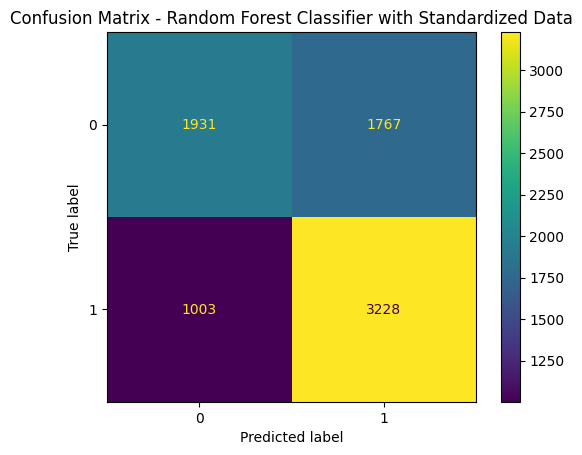

In [150]:
## Confusion Matrix - After Standardization

# Model's predictions on the test data
y_pred_RF_std = RF_clf_std.predict(X_test_std)

disp_RF_std = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_RF_std))
disp_RF_std.plot()
plt.title('Confusion Matrix - Random Forest Classifier with Standardized Data')
plt.show()

In [151]:
# Classification report - After Standardization

RF_report_std = classification_report(y_test, y_pred_RF_std)
print(RF_report_std)

              precision    recall  f1-score   support

           0       0.66      0.52      0.58      3698
           1       0.65      0.76      0.70      4231

    accuracy                           0.65      7929
   macro avg       0.65      0.64      0.64      7929
weighted avg       0.65      0.65      0.64      7929



In [75]:
# Cross validation of the Random Forest Classifier model using 5 folds in terms of mean +/- std

cv_scores_RF_std = cross_val_score(RF_clf_std, X_train_std, y_train, scoring='f1_weighted', cv=5)
cv_score_RF_std = (str(cv_scores_RF_std.mean().round(5)) + ' +/- ' + str(cv_scores_RF_std.std().round(5)))
print('\n', cv_score_RF_std)


 0.65739 +/- 0.00765


### PCA Reduced Data

In [76]:
# Fitting the PCA Reduced data into Random Forest Classifier model
RF_clf_pca = RandomForestClassifier(n_estimators=100, max_leaf_nodes=32, n_jobs=-1, random_state=42)
RF_clf_pca.fit(X_train_pca, y_train)

# The model's score on the testing data
print("PCA REDUCED DATA")
RF_clf_score_pca = RF_clf_pca.score(X_test_pca, y_test)
print('R2 score: ', RF_clf_score_pca)

PCA REDUCED DATA
R2 score:  0.6381637028629084


In [154]:
# from sklearn.tree import export_graphviz

# export_graphviz(RF_clf_pca, out_file="ONP RF_clf_pca.dot", feature_names=X.columns, class_names=["0","1"], rounded=True, filled=True)

# from graphviz import Source
# Source.from_file("ONP RF_clf_pca.dot")

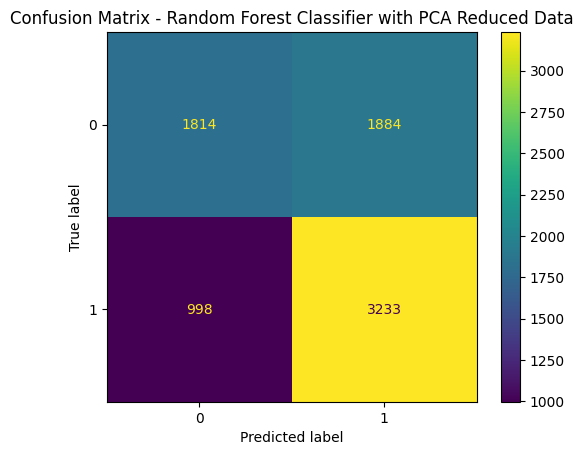

In [155]:
## Confusion Matrix - After PCA

# Model's predictions on the test data
y_pred_RF_pca = RF_clf_pca.predict(X_test_pca)

disp_RF_pca = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_RF_pca))
disp_RF_pca.plot()
plt.title('Confusion Matrix - Random Forest Classifier with PCA Reduced Data')
plt.show()

In [156]:
# Classification report - After Standardization

RF_report_pca = classification_report(y_test, y_pred_RF_pca)
print(RF_report_pca)

              precision    recall  f1-score   support

           0       0.65      0.49      0.56      3698
           1       0.63      0.76      0.69      4231

    accuracy                           0.64      7929
   macro avg       0.64      0.63      0.62      7929
weighted avg       0.64      0.64      0.63      7929



In [77]:
# Cross validation of the Random Forest Classifier model using 5 folds in terms of mean +/- std

cv_scores_RF_pca = cross_val_score(RF_clf_pca, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_RF_pca = (str(cv_scores_RF_pca.mean().round(5)) + ' +/- ' + str(cv_scores_RF_pca.std().round(5)))
print('\n', cv_score_RF_pca)


 0.63 +/- 0.00637


# AdaBoost (Adaptive Boosting)

### Regular Data

In [29]:
# Importing the AdaBoostClassifier class from Scikit-Learn
from sklearn.ensemble import AdaBoostClassifier

# Fitting the data into AdaBoost Classifier model
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_leaf_nodes=32), n_estimators=100, learning_rate=0.5, algorithm='SAMME.R', random_state=42)
ada_clf.fit(X_train, y_train)

# The model's score on the testing data
print('REGULAR DATA')
ada_clf_score = ada_clf.score(X_test, y_test)
print('R2 score: ', ada_clf_score)

REGULAR DATA
R2 score:  0.6142010341783327


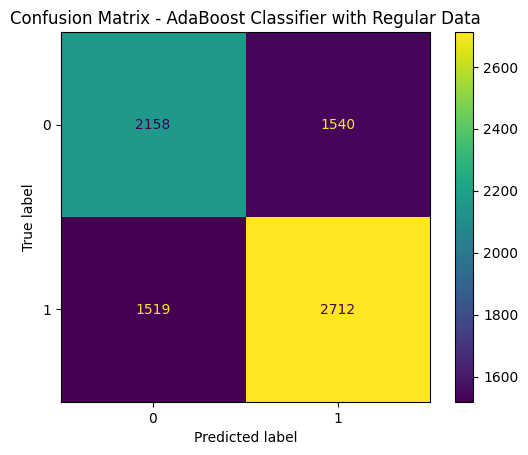

In [30]:
## Confusion Matrix

# Model's predictions on the test data
y_pred_ada = ada_clf.predict(X_test)

disp_ada = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_ada))
disp_ada.plot()
plt.title('Confusion Matrix - AdaBoost Classifier with Regular Data')
plt.show()

In [31]:
# AdaBoost Classifier - Classification report

ada_report = classification_report(y_test, y_pred_ada)
print(ada_report)

              precision    recall  f1-score   support

           0       0.59      0.58      0.59      3698
           1       0.64      0.64      0.64      4231

    accuracy                           0.61      7929
   macro avg       0.61      0.61      0.61      7929
weighted avg       0.61      0.61      0.61      7929



In [32]:
# Cross validation of the AdaBoost Classifier model using 5 folds in terms of mean +/- std

cv_scores_ada = cross_val_score(ada_clf, X_train, y_train, scoring='f1_weighted', cv=5)
cv_score_ada = (str(cv_scores_ada.mean().round(5)) + ' +/- ' + str(cv_scores_ada.std().round(5)))
print('\n', cv_score_ada)


 0.62375 +/- 0.00616


### Standardized Data

In [33]:
# Fitting the data into AdaBoost Classifier model
ada_clf_std = AdaBoostClassifier(DecisionTreeClassifier(max_leaf_nodes=32), n_estimators=100, learning_rate=0.5, algorithm='SAMME.R', random_state=42)
ada_clf_std.fit(X_train_std, y_train)

# The model's score on the testing data
print('STANDARDIZED DATA')
ada_clf_score_std = ada_clf_std.score(X_test_std, y_test)
print('R2 score: ', ada_clf_score_std)

STANDARDIZED DATA
R2 score:  0.6101652162946147


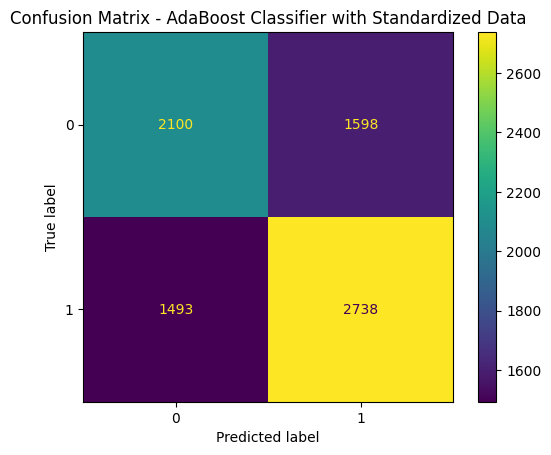

In [34]:
## Confusion Matrix

# Model's predictions on the test data
y_pred_ada_std = ada_clf_std.predict(X_test_std)

disp_ada_std = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_ada_std))
disp_ada_std.plot()
plt.title('Confusion Matrix - AdaBoost Classifier with Standardized Data')
plt.show()

In [35]:
# AdaBoost Classifier - Classification report

ada_report_std = classification_report(y_test, y_pred_ada_std)
print(ada_report_std)

              precision    recall  f1-score   support

           0       0.58      0.57      0.58      3698
           1       0.63      0.65      0.64      4231

    accuracy                           0.61      7929
   macro avg       0.61      0.61      0.61      7929
weighted avg       0.61      0.61      0.61      7929



In [80]:
# Cross validation of the AdaBoost Classifier model using 5 folds in terms of mean +/- std

cv_scores_ada_std = cross_val_score(ada_clf_std, X_train_std, y_train, scoring='f1_weighted', cv=5)
cv_score_ada_std = (str(cv_scores_ada_std.mean().round(5)) + ' +/- ' + str(cv_scores_ada_std.std().round(5)))
print('\n', cv_score_ada_std)


 0.62305 +/- 0.00955


### PCA Reduced Data

In [36]:
# Fitting the data into AdaBoost Classifier model
ada_clf_pca = AdaBoostClassifier(DecisionTreeClassifier(max_leaf_nodes=32), n_estimators=100, learning_rate=0.5, algorithm='SAMME.R', random_state=42)
ada_clf_pca.fit(X_train_pca, y_train)

# The model's score on the testing data
print('PCA REDUCED DATA')
ada_clf_score_pca = ada_clf_pca.score(X_test_pca, y_test)
print('R2 score: ', ada_clf_score_pca)

PCA REDUCED DATA
R2 score:  0.5935174675242779


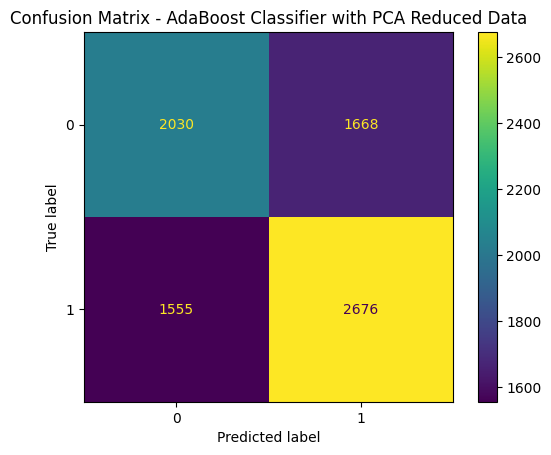

In [37]:
## Confusion Matrix

# Model's predictions on the test data
y_pred_ada_pca = ada_clf_pca.predict(X_test_pca)

disp_ada_pca = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_ada_pca))
disp_ada_pca.plot()
plt.title('Confusion Matrix - AdaBoost Classifier with PCA Reduced Data')
plt.show()

In [38]:
# AdaBoost Classifier - Classification report

ada_report_pca = classification_report(y_test, y_pred_ada_pca)
print(ada_report_pca)

              precision    recall  f1-score   support

           0       0.57      0.55      0.56      3698
           1       0.62      0.63      0.62      4231

    accuracy                           0.59      7929
   macro avg       0.59      0.59      0.59      7929
weighted avg       0.59      0.59      0.59      7929



In [81]:
# Cross validation of the AdaBoost Classifier model using 5 folds in terms of mean +/- std

cv_scores_ada_pca = cross_val_score(ada_clf_pca, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_ada_pca = (str(cv_scores_ada_pca.mean().round(5)) + ' +/- ' + str(cv_scores_ada_pca.std().round(5)))
print('\n', cv_score_ada_pca)


 0.59776 +/- 0.00475


# GradientBoost (Gradient Boosting)

### Regular Data

In [45]:
# Importing the GradientBoostingClassifier class from Scikit-Learn
from sklearn.ensemble import GradientBoostingClassifier

# Fitting the data into GradientBoost Classifier model
grad_clf = GradientBoostingClassifier(max_leaf_nodes=32, n_estimators=100, learning_rate=0.5, random_state=42)
grad_clf.fit(X_train, y_train)

# The model's score on the testing data
print('REGULAR DATA')
grad_clf_score = grad_clf.score(X_test, y_test)
print('R2 score: ', grad_clf_score)

REGULAR DATA
R2 score:  0.651406230293858


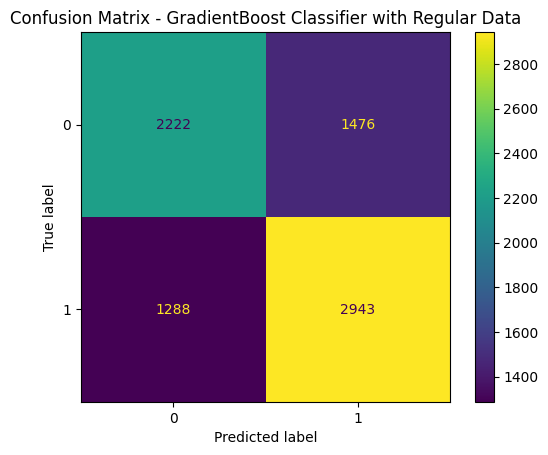

In [ ]:
## Confusion Matrix

# Model's predictions on the test data
y_pred_grad = grad_clf.predict(X_test)

disp_grad = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_grad))
disp_grad.plot()
plt.title('Confusion Matrix - GradientBoost Classifier with Regular Data')
plt.show()

In [41]:
# GradientBoost Classifier - Classification report

grad_report = classification_report(y_test, y_pred_grad)
print(grad_report)

              precision    recall  f1-score   support

           0       0.63      0.60      0.62      3698
           1       0.67      0.70      0.68      4231

    accuracy                           0.65      7929
   macro avg       0.65      0.65      0.65      7929
weighted avg       0.65      0.65      0.65      7929



In [42]:
# Cross validation of the GradientBoost Classifier model using 5 folds in terms of mean +/- std

cv_scores_grad = cross_val_score(grad_clf, X_train, y_train, scoring='f1_weighted', cv=5)
cv_score_grad = (str(cv_scores_grad.mean().round(5)) + ' +/- ' + str(cv_scores_grad.std().round(5)))
print('\n', cv_score_grad)


 0.65349 +/- 0.00636


### Standardized Data

In [36]:
# Fitting the data into GradientBoost Classifier model
grad_clf_std = GradientBoostingClassifier(max_leaf_nodes=32, n_estimators=100, learning_rate=0.5, random_state=42)
grad_clf_std.fit(X_train_std, y_train)

# The model's score on the testing data
print('STANDARDIZED DATA')
grad_clf_score_std = grad_clf_std.score(X_test_std, y_test)
print('R2 score: ', grad_clf_score_std)

STANDARDIZED DATA
R2 score:  0.6471181737924077


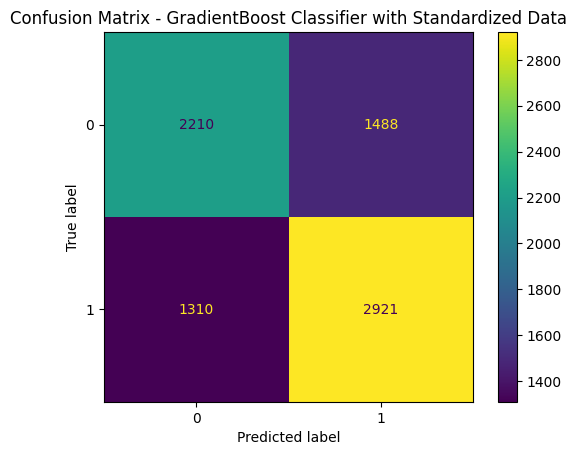

In [47]:
## Confusion Matrix

# Model's predictions on the test data
y_pred_grad_std = grad_clf_std.predict(X_test_std)

disp_grad_std = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_grad_std))
disp_grad_std.plot()
plt.title('Confusion Matrix - GradientBoost Classifier with Standardized Data')
plt.show()

In [48]:
# GradientBoost Classifier - Classification report

grad_report_std = classification_report(y_test, y_pred_grad_std)
print(grad_report_std)

              precision    recall  f1-score   support

           0       0.63      0.60      0.61      3698
           1       0.66      0.69      0.68      4231

    accuracy                           0.65      7929
   macro avg       0.65      0.64      0.64      7929
weighted avg       0.65      0.65      0.65      7929



In [49]:
# Cross validation of the GradientBoost Classifier model using 5 folds in terms of mean +/- std

cv_scores_grad_std = cross_val_score(grad_clf_std, X_train_std, y_train, scoring='f1_weighted', cv=5)
cv_score_grad_std = (str(cv_scores_grad_std.mean().round(5)) + ' +/- ' + str(cv_scores_grad_std.std().round(5)))
print('\n', cv_score_grad_std)


 0.65784 +/- 0.00417


### PCA Reduced Data

In [50]:
# Fitting the data into GradientBoost Classifier model
grad_clf_pca = GradientBoostingClassifier(max_leaf_nodes=32, n_estimators=100, learning_rate=0.5, random_state=42)
grad_clf_pca.fit(X_train_pca, y_train)

# The model's score on the testing data
print('PCA REDUCED DATA')
grad_clf_score_pca = grad_clf_pca.score(X_test_pca, y_test)
print('R2 score: ', grad_clf_score_pca)

PCA REDUCED DATA
R2 score:  0.6215159540925715


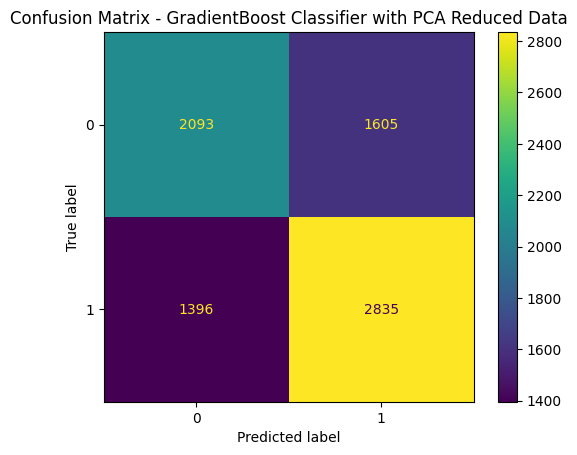

In [51]:
## Confusion Matrix

# Model's predictions on the test data
y_pred_grad_pca = grad_clf_pca.predict(X_test_pca)

disp_grad_pca = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_grad_pca))
disp_grad_pca.plot()
plt.title('Confusion Matrix - GradientBoost Classifier with PCA Reduced Data')
plt.show()

In [52]:
# GradientBoost Classifier - Classification report

grad_report_pca = classification_report(y_test, y_pred_grad_pca)
print(grad_report_pca)

              precision    recall  f1-score   support

           0       0.60      0.57      0.58      3698
           1       0.64      0.67      0.65      4231

    accuracy                           0.62      7929
   macro avg       0.62      0.62      0.62      7929
weighted avg       0.62      0.62      0.62      7929



In [53]:
# Cross validation of the GradientBoost Classifier model using 5 folds in terms of mean +/- std

cv_scores_grad_pca = cross_val_score(grad_clf_pca, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_grad_pca = (str(cv_scores_grad_pca.mean().round(5)) + ' +/- ' + str(cv_scores_grad_pca.std().round(5)))
print('\n', cv_score_grad_pca)


 0.62908 +/- 0.00533


# Hyperparameter Tuning

Several of the models we used for our experiments have hyperparameters - parameters set by us that control the model's performance but are external to it, ie. not determined by it. To improve the performance of our models, we manually tuned these values through trial and error. But there are systematic ways in Machine Learning to tune these hyperparameters, which we will now implement in this section.

The method we will be using - Grid Search CV - is a brute force method that tries every possible combination of the hyperparameters specified and finds their optimal values, ie. values that give the best performance for the model. The 'CV' denotes that the experiments run are cross-validated. Since these have high running times, we will limit our focus only to the best n experiments across all implemented so far.

### LinearSVC

In [18]:
# Inspecting the Hyperparameter space of the model
ht_linsvc = LinearSVC()
ht_linsvc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [25]:
# Creating a grid of the interested hyperparameters and range within which to tune
ht_linsvc_grid = [{
    'C': np.linspace(1, 10, 4),
}]

# Importing the GridSearchCV class from Scikit-Learn
from sklearn.model_selection import GridSearchCV
gs_linsvc = GridSearchCV(estimator = ht_linsvc, param_grid = ht_linsvc_grid, cv = 5)

# Fitting the data into the GridSearchCV model
gs_linsvc.fit(X_train_std, y_train)

# Finding the best Hyperparameter values and corresponding R2 score
print("Best estimator", gs_linsvc.best_estimator_)
print("Best parameters", gs_linsvc.best_params_)
gs_linsvc_score = gs_linsvc.best_score_
print("Best Cross-validated Classification accuracy", gs_linsvc_score)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to co

Best estimator LinearSVC()
Best parameters {'C': 1.0}
Best Cross-validated Classification accuracy 0.6552315017519664


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Random Forest

In [27]:
# Inspecting the Hyperparameter space of the model
ht_RF = RandomForestClassifier(n_jobs=-1, random_state=42)
ht_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [52]:
# Creating a grid of the interested hyperparameters and range within which to tune
ht_RF_grid = [{
    'max_leaf_nodes': [4,8,16,32,64],
    'n_estimators': [25,50,100,150],
    'n_jobs': [-1],
    'random_state': [42]
}]

# Importing the GridSearchCV class from Scikit-Learn and creating an object
from sklearn.model_selection import GridSearchCV
gs_RF = GridSearchCV(estimator = ht_RF, param_grid = ht_RF_grid, cv = 5)

# Fitting the data into the GridSearchCV model
gs_RF.fit(X_train_std, y_train)

# Finding the best Hyperparameter values and corresponding R2 score
print("Best estimator", gs_RF.best_estimator_)
print("Best parameters", gs_RF.best_params_)
gs_RF_score = gs_RF.best_score_
print("Best Cross-validated Classification accuracy", gs_RF_score)

Best estimator RandomForestClassifier(max_leaf_nodes=64, n_jobs=-1, random_state=42)
Best parameters {'max_leaf_nodes': 64, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
Best Cross-validated Classification accuracy 0.6663304505721181


### AdaBoost

In [46]:
# Inspecting the Hyperparameter space of the model
ht_ada = AdaBoostClassifier(DecisionTreeClassifier(max_leaf_nodes=32), algorithm='SAMME.R', random_state=42)
ht_ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': 32,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(max_leaf_nodes=32),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

In [47]:
# Creating a grid of the interested hyperparameters and range within which to tune
ht_ada_grid = [{
    'learning_rate': [0.1,0.5, 1],
    'n_estimators': [100,150,200],
    'estimator__max_leaf_nodes': [32],
    'algorithm': ['SAMME.R'],
    'random_state': [42]
}]

# Importing the GridSearchCV class from Scikit-Learn and creating an object
from sklearn.model_selection import GridSearchCV
gs_ada = GridSearchCV(estimator = ht_ada, param_grid = ht_ada_grid, cv = 5)

# Fitting the data into the GridSearchCV model
gs_ada.fit(X_train_std, y_train)

# Finding the best Hyperparameter values and corresponding R2 score
print("Best estimator", gs_ada.best_estimator_)
print("Best parameters", gs_ada.best_params_)
gs_ada_score = gs_ada.best_score_
print("Best Cross-validated Classification accuracy", gs_ada_score)

Best estimator AdaBoostClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=32),
                   learning_rate=0.1, n_estimators=100, random_state=42)
Best parameters {'algorithm': 'SAMME.R', 'estimator__max_leaf_nodes': 32, 'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 42}
Best Cross-validated Classification accuracy 0.6508167094368374


### GradientBoost

In [48]:
# Inspecting the Hyperparameter space of the model
ht_grad = GradientBoostingClassifier(max_leaf_nodes=32, random_state=42)
ht_grad.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': 32,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [49]:
# Creating a grid of the interested hyperparameters and range within which to tune
ht_grad_grid = [{
    'learning_rate': [0.1,0.5, 1],
    'n_estimators': [100,150,200],
    'max_leaf_nodes': [32],
    'random_state': [42]
}]

# Importing the GridSearchCV class from Scikit-Learn and creating an object
from sklearn.model_selection import GridSearchCV
gs_grad = GridSearchCV(estimator = ht_grad, param_grid = ht_grad_grid, cv = 5)

# Fitting the data into the GridSearchCV model
gs_grad.fit(X_train_std, y_train)

# Finding the best Hyperparameter values and corresponding R2 score
print("Best estimator", gs_grad.best_estimator_)
print("Best parameters", gs_grad.best_params_)
gs_grad_score = gs_grad.best_score_
print("Best Cross-validated Classification accuracy", gs_grad_score)

Best estimator GradientBoostingClassifier(max_leaf_nodes=32, n_estimators=200, random_state=42)
Best parameters {'learning_rate': 0.1, 'max_leaf_nodes': 32, 'n_estimators': 200, 'random_state': 42}
Best Cross-validated Classification accuracy 0.6704925190974479


# Results

### Classification Accuracy

Viewing and comparing the Classification Accuracy scores across all experiments

In [78]:
row_names = ['Logistic Regression', 'LinearSVC', 'Linear kernel SVC', 'Polynomial kernel SVC', 'RBF kernel SVC', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradientBoost']
col_names = ['Regular Data', 'Standardized Data', 'PCA Reduced Data']
score_matrix = np.array([lr_score, lr_score_std, lr_score_pca, lin_svc_score, lin_svc_score_std, lin_svc_score_pca, 
                         0, 0, svc_lin_score, 0, 0, svc_poly_score, 0, 0, svc_rbf_score, 
                         DT_clf_score, DT_clf_score_std, DT_clf_score_pca, RF_clf_score, RF_clf_score_std, RF_clf_score_pca,
                         ada_clf_score, ada_clf_score_std, ada_clf_score_pca, grad_clf_score, grad_clf_score_std, grad_clf_score_pca]).reshape(len(row_names),len(col_names))
score_df = pd.DataFrame(score_matrix, columns=col_names, index=row_names)
score_df = score_df.replace(0, '-')
score_df

,Regular Data,Standardized Data,PCA Reduced Data
Logistic Regression,0.58507,0.65456,0.636150
LinearSVC,0.5104,0.6533,0.639050
Linear kernel SVC,-,-,0.625680
Polynomial kernel SVC,-,-,0.639420
RBF kernel SVC,-,-,0.644720
Decision Tree,0.64296,0.64296,0.615340
Random Forest,0.650271,0.65065,0.638164
AdaBoost,0.614201,0.610165,0.593517
GradientBoost,0.651406,0.647118,0.621516


### Cross-validated Weighted F1-scores

Viewing and comparing the Cross-validated weighted F1-scores across all experiments

In [89]:
cv_score_matrix = np.array([cv_score_lr, cv_score_lr_std, cv_score_lr_pca, cv_score_linsvc, cv_score_linsvc_std, cv_score_linsvc_pca, 
                            0, 0, cv_score_svclin, 0, 0, cv_score_svcpoly, 0, 0, cv_score_svcrbf, 
                            cv_score_DT, cv_score_DT_std, cv_score_DT_pca, cv_score_RF, cv_score_RF_std, cv_score_RF_pca,
                            cv_score_ada, cv_score_ada_std, cv_score_ada_pca, cv_score_grad, cv_score_grad_std, cv_score_grad_pca]).reshape(len(row_names),len(col_names))
cv_score_df = pd.DataFrame(cv_score_matrix, columns=col_names, index=row_names)
cv_score_df = cv_score_df.replace(0, '-')
cv_score_df

,Regular Data,Standardized Data,PCA Reduced Data
Logistic Regression,0.59376 +/- 0.01425,0.65394 +/- 0.00577,0.63381 +/- 0.00168
LinearSVC,0.4078 +/- 0.06238,0.65408 +/- 0.00588,0.63532 +/- 0.00326
Linear kernel SVC,0,0,0.62283 +/- 0.00237
Polynomial kernel SVC,0,0,0.63955 +/- 0.00486
RBF kernel SVC,0,0,0.64892 +/- 0.00596
Decision Tree,0.64028 +/- 0.00744,0.64028 +/- 0.00744,0.61597 +/- 0.00456
Random Forest,0.65733 +/- 0.00784,0.65739 +/- 0.00765,0.63 +/- 0.00637
AdaBoost,0.62375 +/- 0.00616,0.62305 +/- 0.00955,0.59776 +/- 0.00475
GradientBoost,0.65349 +/- 0.00636,0.65784 +/- 0.00417,0.62908 +/- 0.00533


### Grid Search CV Results

In [50]:
row_names = ['Logistic Regression', 'LinearSVC', 'Linear kernel SVC', 'Polynomial kernel SVC', 'RBF kernel SVC', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradientBoost']
col_names = ['Regular Data', 'Standardized Data', 'PCA Reduced Data']

In [51]:
ht_score_matrix = np.array([0, 0, 0, 0, gs_linsvc_score, 0, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                         0, gs_RF_score, 0, 0, gs_ada_score, 0, 
                         0, gs_grad_score, 0]).reshape(len(row_names),len(col_names))
ht_score_df = pd.DataFrame(ht_score_matrix, columns=col_names, index=row_names)
ht_score_df = ht_score_df.replace(0, '-')
ht_score_df

,Regular Data,Standardized Data,PCA Reduced Data
Logistic Regression,-,-,-
LinearSVC,-,0.655232,-
Linear kernel SVC,-,-,-
Polynomial kernel SVC,-,-,-
RBF kernel SVC,-,-,-
Decision Tree,-,-,-
Random Forest,-,0.66633,-
AdaBoost,-,0.650817,-
GradientBoost,-,0.670493,-
